In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [28]:
df = pd.read_csv('netflix_ratings_data.csv', sep = ',')

In [29]:
df['splitted_genre'] = df['genres'].str.split(',')

In [30]:
genre_df = pd.DataFrame({'col':df['splitted_genre']})

In [31]:
genre_df = genre_df.explode('col')

In [32]:
genre_df = genre_df.drop_duplicates()

In [33]:
genre_df = genre_df.drop([372])

In [36]:
genre_data = genre_df.reset_index(drop=True)

In [38]:
title_genre = df[['title','splitted_genre']]

In [41]:
title_genre_2 = title_genre.copy()
title_genre_2 =title_genre_2.explode('splitted_genre') 

In [45]:
genre_title_count = title_genre_2.groupby('splitted_genre').size().reset_index(name='counts')

In [65]:
genre_title_count = genre_title_count.sort_values(by = 'counts', ascending = True)

<ipython-input-102-778378323164>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='blue',


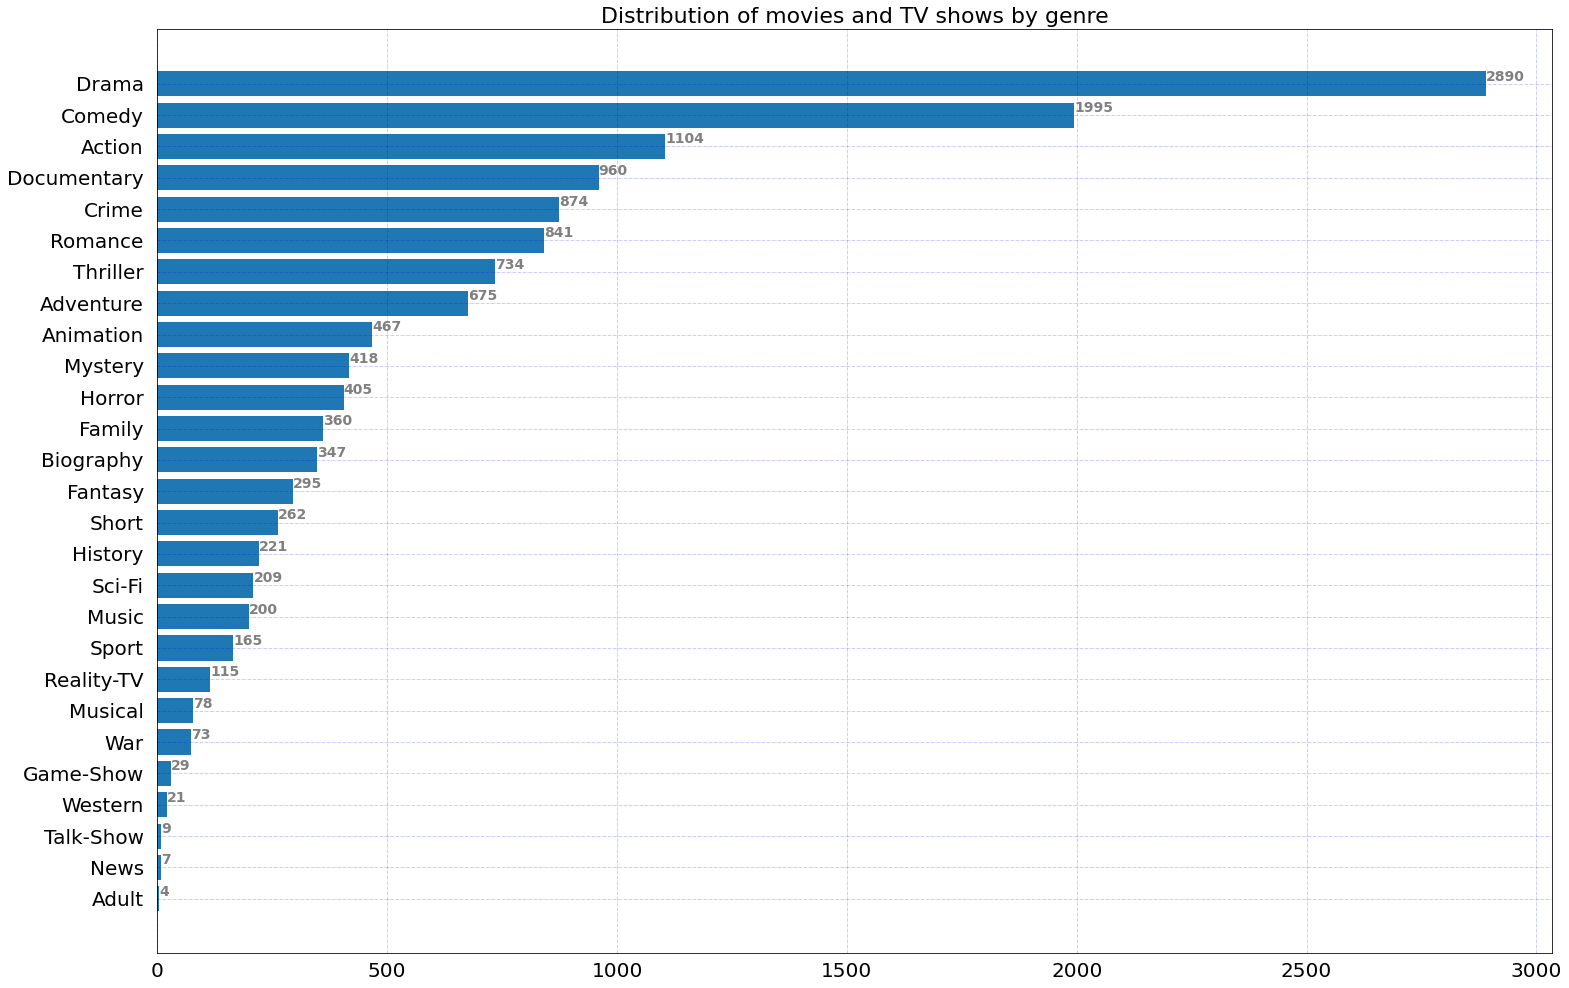

In [102]:
#Reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
genre = genre_title_count['splitted_genre']
number_of_titles = genre_title_count['counts']
fig, ax = plt.subplots(figsize =(25, 17))
ax.barh(genre, number_of_titles)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='blue',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
ax.set_title('Distribution of movies and TV shows by genre', loc = 'center',fontsize = 22,)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.savefig('bar_plot_title_distribution.png')
plt.show()

